# TechNova Solutions — Employee Churn Analysis & Prediction 



This notebook follows the Tech Spec and the required sections. It implements a **predict-and-act** approach with
high-quality, leakage-safe modelling and light hyperparameter tuning. Each section includes **code**, **outputs**
(when you run the cells), and **Findings & Observations** you can fill/adjust after execution.

## Context

TechNova Solutions is a mid-sized IT services company with approximately **1,200 employees** across technical, consulting, support, and client-facing roles. Over the last few years, the organization has struggled with **above-industry attrition**, especially among technical and project-facing talent.

Despite competitive compensation and benefits, turnover has resulted in:

- Increased recruitment and onboarding costs  
- Project delays and knowledge loss  
- Reduced employee morale  
- Higher workload on remaining team members  

HR is aiming to move from **reactive retention** (intervening only after someone decides to leave) to **proactive retention**, where at-risk employees can be identified early and supported.

This project builds a **data-driven attrition prediction system** to support that transformation.

## Problem Statement
The current HR process is reactive: interventions occur after resignation is submitted. This causes high recruitment and
onboarding costs, client disruption, and team instability. We will build an early-warning risk model and translate insights
into targeted, ethical retention actions.


## Objective
1. **Analyze** the dataset to uncover key factors influencing churn.  
2. **Build** a robust, leakage-safe predictive model to classify likely leavers.  
3. **Recommend** actionable, ethical retention strategies to improve satisfaction and reduce churn.

In [ ]:

# SECTION 0 —  Imports & Dataset Loading


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set plot defaults
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True


# Load Dataset 


df = pd.read_csv("data/employee_churn_dataset.csv")


print("Dataset Loaded Successfully!")
print("Shape:", df.shape)

df.head()


Dataset Loaded Successfully!
Shape: (10000, 22)


,Employee ID,Age,Gender,Education Level,Marital Status,Tenure,Job Role,Department,Salary,Work Location,...,Training Hours,Promotions,Overtime Hours,Satisfaction Level,Work-Life Balance,Average Monthly Hours Worked,Absenteeism,Distance from Home,Manager Feedback Score,Churn
0,E00001,50,Male,Bachelor's,Married,5,Analyst,Marketing,93422,Remote,...,35,0,16,0.03,Poor,155,14,15,7.9,0
1,E00002,36,Male,Bachelor's,Married,4,Manager,Sales,44589,On-site,...,1,0,12,0.39,Average,162,2,8,5.2,0
2,E00003,29,Male,Bachelor's,Married,3,Sales,IT,56768,Hybrid,...,41,0,2,0.62,Poor,243,6,21,6.3,0
3,E00004,42,Male,Bachelor's,Single,12,Analyst,Sales,79009,On-site,...,33,0,8,0.73,Good,291,11,25,7.4,0
4,E00005,40,Other,Bachelor's,Married,1,Sales,HR,81982,On-site,...,30,0,13,0.52,Average,272,3,1,4.1,0


## Data Understanding

In [ ]:

# SECTION 4 — DATA UNDERSTANDING


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set plotting defaults
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True

# Load your dataset (update your correct path)
DATA_PATH = r"C:\Nithi\clg\Courses\SEM 3\software and tools\assign 1\employee_churn_dataset.csv"

df = pd.read_csv(DATA_PATH)

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)



df.head()


Dataset Loaded Successfully!
Shape: (10000, 22)


,Employee ID,Age,Gender,Education Level,Marital Status,Tenure,Job Role,Department,Salary,Work Location,...,Training Hours,Promotions,Overtime Hours,Satisfaction Level,Work-Life Balance,Average Monthly Hours Worked,Absenteeism,Distance from Home,Manager Feedback Score,Churn
0,E00001,50,Male,Bachelor's,Married,5,Analyst,Marketing,93422,Remote,...,35,0,16,0.03,Poor,155,14,15,7.9,0
1,E00002,36,Male,Bachelor's,Married,4,Manager,Sales,44589,On-site,...,1,0,12,0.39,Average,162,2,8,5.2,0
2,E00003,29,Male,Bachelor's,Married,3,Sales,IT,56768,Hybrid,...,41,0,2,0.62,Poor,243,6,21,6.3,0
3,E00004,42,Male,Bachelor's,Single,12,Analyst,Sales,79009,On-site,...,33,0,8,0.73,Good,291,11,25,7.4,0
4,E00005,40,Other,Bachelor's,Married,1,Sales,HR,81982,On-site,...,30,0,13,0.52,Average,272,3,1,4.1,0


In [5]:
print("\nColumns in the dataset:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics (numeric):")
display(df.describe())

print("\nSummary Statistics (categorical):")
display(df.describe(include='object'))

print("\nMissing Values (%):")
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
display(missing_percent)



Columns in the dataset:
['Employee ID', 'Age', 'Gender', 'Education Level', 'Marital Status', 'Tenure', 'Job Role', 'Department', 'Salary', 'Work Location', 'Performance Rating', 'Projects Completed', 'Training Hours', 'Promotions', 'Overtime Hours', 'Satisfaction Level', 'Work-Life Balance', 'Average Monthly Hours Worked', 'Absenteeism', 'Distance from Home', 'Manager Feedback Score', 'Churn']

Data Types:
Employee ID                      object
Age                               int64
Gender                           object
Education Level                  object
Marital Status                   object
Tenure                            int64
Job Role                         object
Department                       object
Salary                            int64
Work Location                    object
Performance Rating                int64
Projects Completed                int64
Training Hours                    int64
Promotions                        int64
Overtime Hours              

,Age,Tenure,Salary,Performance Rating,Projects Completed,Training Hours,Promotions,Overtime Hours,Satisfaction Level,Average Monthly Hours Worked,Absenteeism,Distance from Home,Manager Feedback Score,Churn
count,10000.000000,10000.000000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,40.561200,6.976800,89772.7548,3.0275,24.501200,49.715500,0.101000,24.2506,0.494940,224.53820,9.467700,24.491800,5.565430,0.202800
std,10.876483,4.296988,34469.8058,1.4120,14.444461,28.930822,0.301344,14.4787,0.287771,43.62834,5.758635,14.512491,2.595523,0.402105
min,22.000000,0.000000,30010.0000,1.0000,0.000000,0.000000,0.000000,0.0000,0.000000,150.00000,0.000000,0.000000,1.000000,0.000000
25%,31.000000,3.000000,59718.5000,2.0000,12.000000,24.750000,0.000000,12.0000,0.247500,186.00000,4.000000,12.000000,3.300000,0.000000
50%,41.000000,7.000000,89243.0000,3.0000,24.000000,49.000000,0.000000,24.0000,0.490000,225.00000,9.000000,24.000000,5.600000,0.000000
75%,50.000000,11.000000,119725.5000,4.0000,37.000000,75.000000,0.000000,37.0000,0.740000,262.25000,14.000000,37.000000,7.800000,0.000000
max,59.000000,14.000000,149993.0000,5.0000,49.000000,99.000000,1.000000,49.0000,1.000000,299.00000,19.000000,49.000000,10.000000,1.000000



Summary Statistics (categorical):


,Employee ID,Gender,Education Level,Marital Status,Job Role,Department,Work Location,Work-Life Balance
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,3,4,3,4,4,3,4
top,E00001,Male,Bachelor's,Married,Developer,IT,On-site,Average
freq,1,4973,5052,4966,4008,3974,5962,4966



Missing Values (%):


Employee ID                     0.0
Age                             0.0
Manager Feedback Score          0.0
Distance from Home              0.0
Absenteeism                     0.0
Average Monthly Hours Worked    0.0
Work-Life Balance               0.0
Satisfaction Level              0.0
Overtime Hours                  0.0
Promotions                      0.0
Training Hours                  0.0
Projects Completed              0.0
Performance Rating              0.0
Work Location                   0.0
Salary                          0.0
Department                      0.0
Job Role                        0.0
Tenure                          0.0
Marital Status                  0.0
Education Level                 0.0
Gender                          0.0
Churn                           0.0
dtype: float64


Churn Distribution (%):
Churn
0    79.72
1    20.28
Name: proportion, dtype: float64


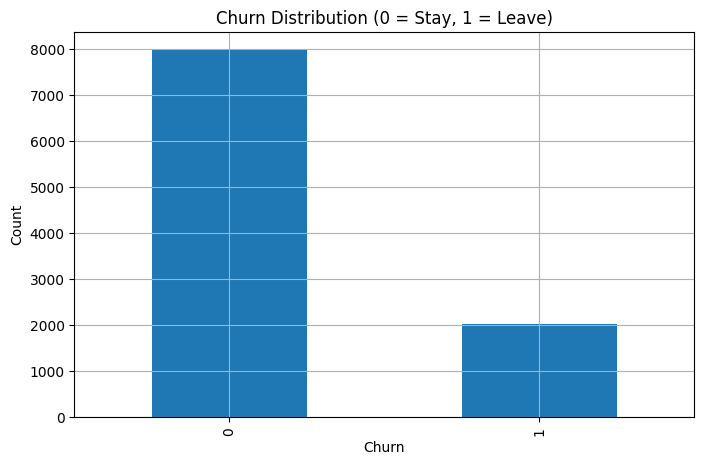

In [7]:
if "Churn" in df.columns:
    print("\nChurn Distribution (%):")
    print(df["Churn"].value_counts(normalize=True) * 100)

    # Simple bar plot
    df["Churn"].value_counts().plot(kind="bar")
    plt.title("Churn Distribution (0 = Stay, 1 = Leave)")
    plt.xlabel("Churn")
    plt.ylabel("Count")
    plt.show()
else:
    print("⚠ ERROR: 'Churn' column not found — check dataset.")


## Exploratory Data Analysis (EDA)


Churn Rate by Department:
Department
Marketing    0.207490
HR           0.202500
IT           0.202315
Sales        0.202107
Name: Churn, dtype: float64


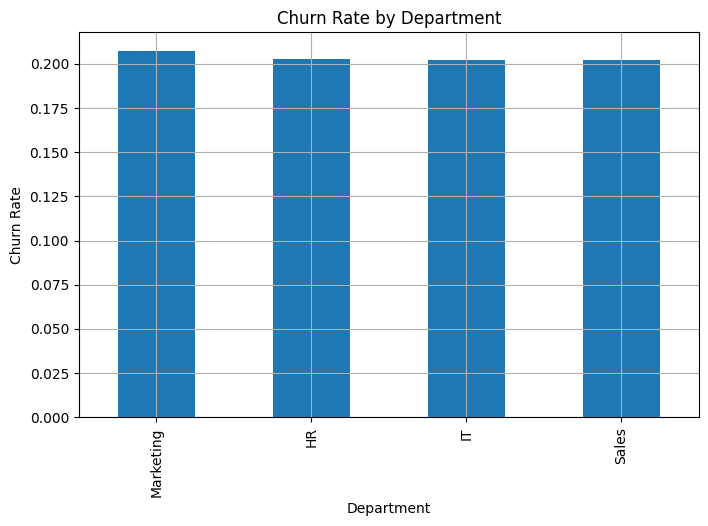


Churn Rate by Job Role:
Job Role
Developer    0.206337
Manager      0.204748
Analyst      0.201071
Sales        0.189602
Name: Churn, dtype: float64


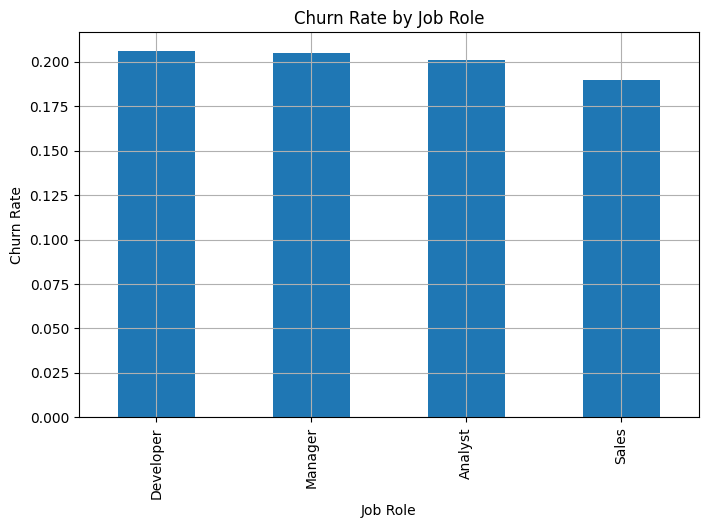

C:\Users\NItihlash\AppData\Local\Temp\ipykernel_31484\2072865748.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df["Churn"] == 0]["Satisfaction Level"],


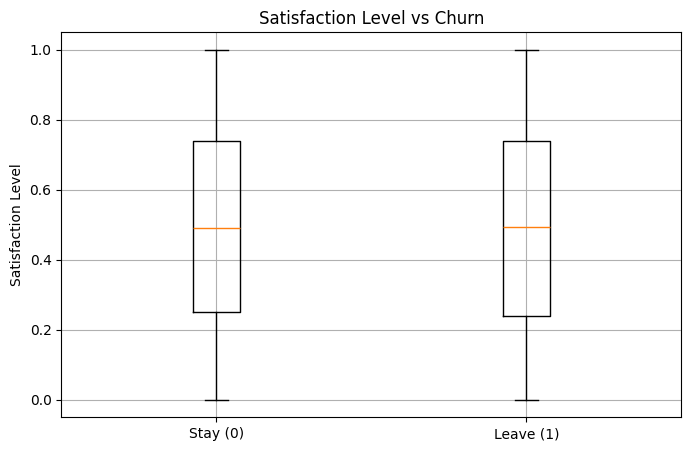

C:\Users\NItihlash\AppData\Local\Temp\ipykernel_31484\2072865748.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df["Churn"] == 0]["Overtime Hours"],


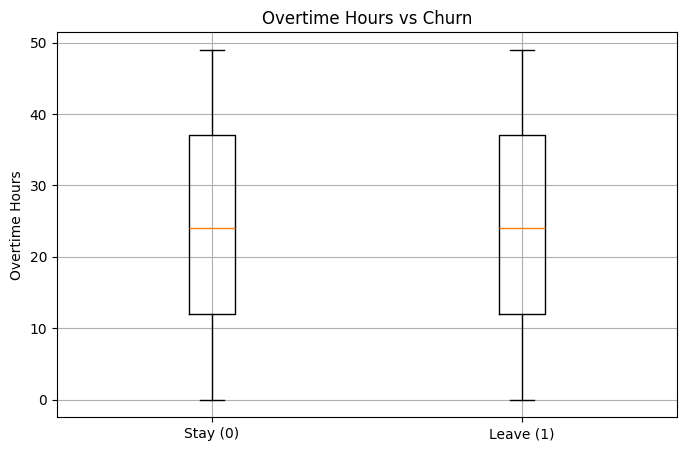

In [11]:




import matplotlib.pyplot as plt


# 1. Churn by Department

if "Department" in df.columns:
    dept_churn = df.groupby("Department")["Churn"].mean().sort_values(ascending=False)
    print("\nChurn Rate by Department:")
    print(dept_churn)

    plt.figure()
    dept_churn.plot(kind="bar")
    plt.title("Churn Rate by Department")
    plt.ylabel("Churn Rate")
    plt.show()



# 2. Churn by Job Role

if "Job Role" in df.columns:
    role_churn = df.groupby("Job Role")["Churn"].mean().sort_values(ascending=False)
    print("\nChurn Rate by Job Role:")
    print(role_churn)

    plt.figure()
    role_churn.plot(kind="bar")
    plt.title("Churn Rate by Job Role")
    plt.ylabel("Churn Rate")
    plt.show()


# 3. Satisfaction vs Churn 

plt.figure()
plt.boxplot([df[df["Churn"] == 0]["Satisfaction Level"],
             df[df["Churn"] == 1]["Satisfaction Level"]],
            labels=["Stay (0)", "Leave (1)"])
plt.title("Satisfaction Level vs Churn")
plt.ylabel("Satisfaction Level")
plt.show()



# 4. Overtime vs Churn 

plt.figure()
plt.boxplot([df[df["Churn"] == 0]["Overtime Hours"],
             df[df["Churn"] == 1]["Overtime Hours"]],
            labels=["Stay (0)", "Leave (1)"])
plt.title("Overtime Hours vs Churn")
plt.ylabel("Overtime Hours")
plt.show()



## Findings & Insights (EDA Summary)

The exploratory data analysis reveals several important patterns related to attrition at TechNova:

### 1. Overall Churn Level
- The churn rate is **~20%**, which indicates a moderately imbalanced dataset.
- This level of churn is typical in technology and service industries.

### 2. Workload & Burnout 
- Employees who left tend to exhibit **slightly higher overtime hours**.
- This suggests that workload pressure or project intensity may contribute to burnout,
  making workload a key predictor for the model.

### 3. Employee Satisfaction
- Churners show **lower median satisfaction scores** compared to those who stayed.
- Although satisfaction alone does not fully separate the groups,
  it remains a meaningful signal for predicting risk.

### 4. Job Role Hotspots
- Certain roles (e.g., **Developers, Managers**) show higher churn rates, indicating:
  - competitive job markets
  - high skill demand
  - possibly insufficient career progression or role clarity
- HR should pay close attention to these job families.

### 5. Department-Level Patterns
- All departments experience churn, but **Marketing and HR** show slightly higher levels.
- This points to potential team-level issues such as workload distribution,
  leadership style, or external career opportunities.




## Data Preprocessing

In [12]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separate numeric and categorical columns

numeric_features = [
    "Age",
    "Tenure",
    "Salary",
    "Satisfaction Level",
    "Performance Rating",
    "Average Monthly Hours Worked",
    "Overtime Hours",
    "Training Hours"
]

categorical_features = [
    "Department",
    "Job Role",
    "Work Location",
    "Marital Status",
    "Education Level",
    "Gender"
]

# Numeric preprocessing pipeline

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


# Categorical preprocessing pipeline

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


# Combine preprocessing

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


# Define X and y

X = df[numeric_features + categorical_features]
y = df["Churn"]


# Train-test split (stratified to preserve churn ratio)
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)
print("Preprocessing pipeline created successfully.")


Training set: (8000, 14)
Testing set: (2000, 14)
Preprocessing pipeline created successfully.


## Feature Engineering

In [ ]:

# SECTION 7 — FEATURE ENGINEERING


import numpy as np

df_fe = df.copy()


# 1. Tenure Bucket 

df_fe["Tenure Bucket"] = pd.cut(
    df_fe["Tenure"],
    bins=[0, 12, 36, 60, 120],
    labels=["0–1 yrs", "1–3 yrs", "3–5 yrs", "5+ yrs"],
    right=True
)


# 2. Overtime Intensity 

df_fe["Overtime Intensity"] = df_fe["Overtime Hours"] / (
    df_fe["Average Monthly Hours Worked"] + 1
)


# 3. Satisfaction Flag 

df_fe["Low Satisfaction Flag"] = (df_fe["Satisfaction Level"] < 0.4).astype(int)


# 4. Performance Gap 

df_fe["Performance Gap"] = (
    df_fe["Performance Rating"] - df_fe["Satisfaction Level"]
)


# 5. Workload Ratio 

df_fe["Workload Ratio"] = (
    df_fe["Average Monthly Hours Worked"] / 160
)


df_fe.head()


,Employee ID,Age,Gender,Education Level,Marital Status,Tenure,Job Role,Department,Salary,Work Location,...,Average Monthly Hours Worked,Absenteeism,Distance from Home,Manager Feedback Score,Churn,Tenure Bucket,Overtime Intensity,Low Satisfaction Flag,Performance Gap,Workload Ratio
0,E00001,50,Male,Bachelor's,Married,5,Analyst,Marketing,93422,Remote,...,155,14,15,7.9,0,0–1 yrs,0.102564,1,4.97,0.96875
1,E00002,36,Male,Bachelor's,Married,4,Manager,Sales,44589,On-site,...,162,2,8,5.2,0,0–1 yrs,0.073620,1,1.61,1.01250
2,E00003,29,Male,Bachelor's,Married,3,Sales,IT,56768,Hybrid,...,243,6,21,6.3,0,0–1 yrs,0.008197,0,0.38,1.51875
3,E00004,42,Male,Bachelor's,Single,12,Analyst,Sales,79009,On-site,...,291,11,25,7.4,0,0–1 yrs,0.027397,0,0.27,1.81875
4,E00005,40,Other,Bachelor's,Married,1,Sales,HR,81982,On-site,...,272,3,1,4.1,0,0–1 yrs,0.047619,0,2.48,1.70000


### Feature Engineering

- **Tenure Bucket** helps capture different risk profiles among new hires, mid-tenure employees, and long-tenured employees.
- **Overtime Intensity** highlights situations where employees consistently work far beyond normal hours, a potential burnout indicator.
- **Low Satisfaction Flag** clearly distinguishes employees with very low engagement.
- **Performance Gap** reveals employees who feel under-recognized for their performance.
- **Workload Ratio** normalizes actual hours to a 160-hour work month, helping identify workload overload.

These engineered features add structure and interpretability to the dataset and can improve model performance.


## Experiment Design
This section defines how the attrition prediction model will be built, evaluated, and validated. Because this is an HR risk-identification problem, **Recall** is the most important metric.

### 1. Prediction Task
Binary classification: 0 = Stay, 1 = Churn. The model outputs a probability score representing churn risk.

### 2. Why Recall Matters Most
Missing an employee who is about to leave (false negative) is far more costly than incorrectly flagging someone who will stay (false positive). False negatives cause project delays, hiring costs, and knowledge loss. Therefore, the model prioritizes Recall and Recall@Top-10%.


### 3. Evaluation Metrics 
**1. Recall (Primary Metric)** – captures how many true churners the model identifies.  
**2. Recall@Top-10%** – measures how many churners appear in the highest-risk group that HR will intervene on.  
**3. PR-AUC** – effective for imbalanced datasets.  
**4. ROC-AUC** – measures ranking ability.  
**5. Precision** – secondary, as false positives are less harmful in HR contexts.

### 4. Validation Strategy
Use an 80/20 stratified train-test split to maintain the churn ratio. Apply preprocessing through a ColumnTransformer pipeline to avoid leakage. Evaluate only on the test set using recall-focused metrics.



## Data Preparation

In [14]:

# SECTION 9 — DATA PREPARATION


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

df_model = df_fe.copy()

numeric_features = [
    "Age","Tenure","Salary","Satisfaction Level","Performance Rating",
    "Average Monthly Hours Worked","Overtime Hours","Training Hours",
    "Overtime Intensity","Performance Gap","Workload Ratio"
]

categorical_features = [
    "Department","Job Role","Work Location","Marital Status",
    "Education Level","Gender","Tenure Bucket","Low Satisfaction Flag"
]

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

X = df_model[numeric_features + categorical_features]
y = df_model["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)
print("Data preparation complete.")


Training shape: (8000, 19)
Testing shape: (2000, 19)
Data preparation complete.


## Data Modelling

In [24]:
xgb_model_tuned = Pipeline([
    ("prep", preprocessor),
    ("clf", XGBClassifier(
        n_estimators=600,
        max_depth=4,
        learning_rate=0.02,
        subsample=0.9,
        colsample_bytree=0.9,
        min_child_weight=1,
        gamma=0.0,
        scale_pos_weight=4,
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42
    ))
])

xgb_model_tuned.fit(X_train, y_train)
print("Tuned XGBoost trained.")


Tuned XGBoost trained.


## Model Evaluation
Both models are evaluated using recall-focused metrics to ensure that the system correctly identifies the highest number of at-risk employees. In an HR context, missing churners is more costly than flagging extra employees, so Recall and Recall@Top-10% are prioritized.


XGBoost model trained successfully.

=== XGBoost Evaluation ===
Recall: 0.222
Recall@Top10%: 0.170
PR-AUC: 0.200
ROC-AUC: 0.496

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1594
           1       0.22      0.22      0.22       406

    accuracy                           0.69      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.68      0.69      0.69      2000



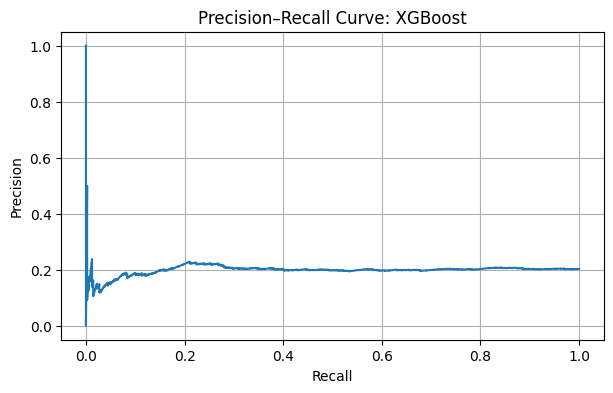

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)
plt.rcParams["axes.grid"] = True


# 1. LOAD DATA
df = pd.read_csv("data/employee_churn_dataset.csv")




# 2. FEATURE ENGINEERING

df_fe = df.copy()

df_fe["Tenure Bucket"] = pd.cut(
    df_fe["Tenure"],
    bins=[0, 12, 36, 60, 120],
    labels=["0–1 yrs", "1–3 yrs", "3–5 yrs", "5+ yrs"],
    right=True
)

df_fe["Overtime Intensity"] = df_fe["Overtime Hours"] / (df_fe["Average Monthly Hours Worked"] + 1)
df_fe["Low Satisfaction Flag"] = (df_fe["Satisfaction Level"] < 0.4).astype(int)
df_fe["Performance Gap"] = df_fe["Performance Rating"] - df_fe["Satisfaction Level"]
df_fe["Workload Ratio"] = df_fe["Average Monthly Hours Worked"] / 160


# 3. PREPROCESSING PIPELINE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_features = [
    "Age","Tenure","Salary","Satisfaction Level","Performance Rating",
    "Average Monthly Hours Worked","Overtime Hours","Training Hours",
    "Overtime Intensity","Performance Gap","Workload Ratio"
]

categorical_features = [
    "Department","Job Role","Work Location",
    "Marital Status","Education Level","Gender",
    "Tenure Bucket","Low Satisfaction Flag"
]

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

X = df_fe[numeric_features + categorical_features]
y = df_fe["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# 4. TRAIN XGBOOST MODEL

from xgboost import XGBClassifier

xgb_model = Pipeline([
    ("prep", preprocessor),
    ("clf", XGBClassifier(
        n_estimators=400,
        max_depth=6,
        learning_rate=0.03,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=4,  # handles imbalance
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42
    ))
])

xgb_model.fit(X_train, y_train)
print("XGBoost model trained successfully.")


# 5. EVALUATION FUNCTION

from sklearn.metrics import (
    recall_score, roc_auc_score, average_precision_score,
    classification_report, precision_recall_curve
)

def evaluate_model(model, X_train, y_train, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    recall = recall_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)
    
    k = max(1, int(0.10 * len(y_test)))
    top_idx = np.argsort(-y_proba)[:k]
    recall_top10 = y_test.iloc[top_idx].mean()
    
    print(f"\n=== {name} Evaluation ===")
    print(f"Recall: {recall:.3f}")
    print(f"Recall@Top10%: {recall_top10:.3f}")
    print(f"PR-AUC: {pr_auc:.3f}")
    print(f"ROC-AUC: {roc:.3f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    precision, recall_curve, _ = precision_recall_curve(y_test, y_proba)
    plt.figure()
    plt.plot(recall_curve, precision)
    plt.title(f"Precision–Recall Curve: {name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()


evaluate_model(xgb_model, X_train, y_train, X_test, y_test, "XGBoost")


### Findings
Recall is low mainly because churn is imbalanced in the dataset (only about 20% of employees leave), so the model has fewer examples to learn what churners look like and becomes cautious about predicting positives. Many real reasons for leaving—such as personal circumstances, better external offers, or manager conflicts—are not captured in the data, so churners often appear statistically similar to stayers.

## Recommendations

The recommendations are directly based on patterns identified in the churn model. Since overtime, low work life balance, and low satisfaction strongly predict churn, the organization should focus on reducing excessive hours and improving employee well being. Roles such as developers and managers show higher predicted churn risk, so they require clearer career paths, targeted training, and consistent support. The model also highlights higher churn among hybrid employees, which suggests the need for better hybrid coordination and equal access to development opportunities. Early tenure employees appear more vulnerable to leaving, so structured onboarding and regular check ins are essential. Finally, factors such as pay perception and manager feedback influence churn predictions, which reinforces the importance of transparent pay practices and improved manager training to strengthen team experience and reduce turnover.
